# tSNE Algorithm

### t-SNE
### t-Distributed stochastic neighbor embedding

### Used for downsizeing data and display in graph as 2D or 3D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Graph Config
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE

Load data Boston Properties Dataset

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Create DataFrame

In [6]:
# Get all data from dataset

data = boston.data

In [7]:
# Get all columns names

feature_names = boston.feature_names

In [8]:
# Create DataFrame named: X

X = pd.DataFrame(data, columns=feature_names)

In [9]:
# Show first 5 rows

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Get description about DataFrame

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
# Get prices from boston dataset

price = boston.target

# 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split data into test and train models based on 30% of all data

X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Scaling Features

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Create object scaler

scaler = StandardScaler()

In [17]:
# using fit_transform build a model

X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
# results as numpy transfer intop DataFrame

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [20]:
# Same here

X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

### Start Using t-SNE

In [21]:
# Create model t-SNE
# n_components - how many axis for each object
# learning_rate - how close dot will be located (10 - 1000)
#


tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [22]:
# Use Fit_transform to X_train_scaled

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [23]:
# result 2D numPy

X_train_tsne

array([[ 1.97306767e+01, -1.94626217e+01],
       [ 1.21997356e+01,  4.55679685e-01],
       [ 2.79763107e+01, -2.31479168e+01],
       [ 2.82301903e+01, -2.44654903e+01],
       [ 2.38460693e+01, -1.71478729e+01],
       [-1.72620571e+00, -1.22397213e+01],
       [-3.47646618e+00, -1.07678719e+01],
       [-1.11658220e+01,  5.70147228e+00],
       [-1.52042179e+01,  1.49383354e+01],
       [ 2.71438313e+01, -1.37679443e+01],
       [-1.20941334e+01,  1.30416002e+01],
       [ 1.83208675e+01, -1.90984097e+01],
       [-2.58563066e+00,  4.81087399e+00],
       [-1.39892826e+01,  1.72273140e+01],
       [ 2.88109398e+01, -2.24357510e+01],
       [-1.74500217e+01,  1.83598404e+01],
       [-8.92891026e+00,  1.89253163e+00],
       [ 2.82703533e+01, -2.14444752e+01],
       [-1.51507416e+01,  1.34391785e+01],
       [ 2.08362331e+01, -1.52325583e+01],
       [ 9.81539154e+00,  4.43877816e-01],
       [-5.93669987e+00, -2.32771444e+00],
       [-1.33501492e+01,  1.51200075e+01],
       [-1.

In [24]:
# Using this build Graph

X_train_tsne.shape

(354, 2)

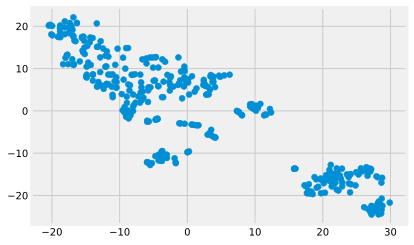

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Split this into 2 clusters

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=2)

In [28]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [29]:
pd.value_counts(labels_train)

1    232
0    122
dtype: int64

In [30]:
labels_test = kmeans.predict(X_test_scaled)

### t_SNE Graph

Text(25, -7, 'Cluster 1')

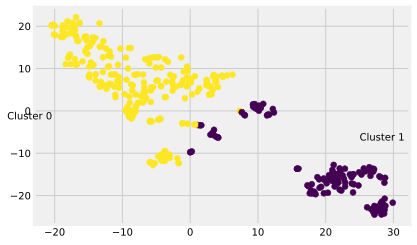

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -2, 'Cluster 0')
plt.text(25, -7, 'Cluster 1')

# Closer look at each cluster

In [32]:
y_train.mean()

22.595762711864406

In [34]:
y_train[labels_train==0].mean()

16.227868852459018

In [35]:
y_train[labels_train==1].mean()

25.94439655172414

### Build Graph to compare prices

Text(0.5, 0, 'Price')

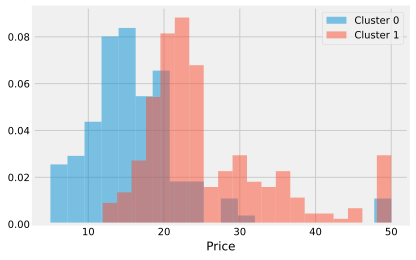

In [37]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha = 0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha = 0.5)
plt.legend(['Cluster 0', 'Cluster 1'])
plt.xlabel('Price')

In [38]:
X_train.loc[labels_train==0, 'RM'].mean()

5.909286885245898

In [39]:
X_train.loc[labels_train==1, 'RM'].mean()

6.448517241379314

Compare prices compare criminal area

In [40]:
X_train.loc[labels_train==0, 'CRIM'].mean()

9.05679418032787

In [41]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.26798159482758627

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

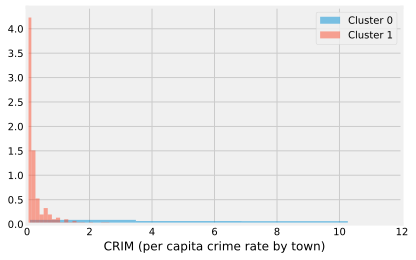

In [44]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha = 0.5)
plt.xlim(0, 12)
plt.legend(['Cluster 0', 'Cluster 1'])
plt.xlabel('CRIM (per capita crime rate by town)')

Compare prices compare Oxides concentration

Text(0.5, 0, 'NOX (\nnitric pxides concentration(parts per 10 million))')

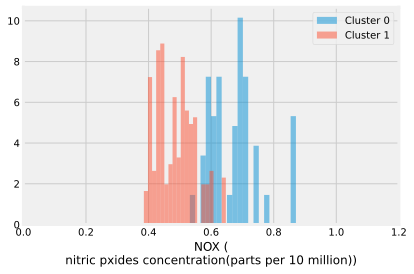

In [45]:
plt.hist(X_train.loc[labels_train==0, 'NOX'], bins = 20, density = True, alpha = 0.5)
plt.hist(X_train.loc[labels_train==1, 'NOX'], bins = 20, density = True, alpha = 0.5)
plt.xlim(0, 1.2)
plt.legend(['Cluster 0', 'Cluster 1'])
plt.xlabel('NOX (\nnitric pxides concentration(parts per 10 million))')

### Base Model of predict prices, before spliting into clusters

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
y_test_pred = lr.predict(X_test_scaled)

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test, y_test_pred)

0.6508417720329546

### 2 Models Builded based on different clusters

In [52]:
# First Model

lr.fit(X_train_scaled.loc[labels_train==0, :],
      y_train[labels_train==0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])

r2_score(y_test[labels_test==0], y_test_pred_0)

0.6458127429551196

In [54]:
# Second Model

lr.fit(X_train_scaled.loc[labels_train==1, :],
      y_train[labels_train==1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])

r2_score(y_test[labels_test==1], y_test_pred_1)

0.8316034335298439

### Join together results

In [55]:
y_test_all = np.hstack([y_test[labels_test==0],
                       y_test[labels_test==1]])

In [57]:
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [58]:
r2_score(y_test_all, y_test_pred_all)

0.8055877528812476